In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("fraudTrain.csv")




In [2]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Convert transaction date n time and date of birth columns type into date type
# Date type can be used for better visualisation

# Convert 'dob' column to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
# Convert 'dob' column to datetime
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

In [4]:
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

# Print the columns to verify the changes
print(df.columns)

Index(['Unnamed:_0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [5]:
# Replace gender (possible cases) value with 0 and 1
# 0 represent female and 1 represent male
df['gender'] = df['gender'].str.lower()

# Replace values based on conditions
df['gender'] = df['gender'].apply(lambda x: 1 if x.startswith('m') else (0 if x.startswith('f') else None))


In [6]:
# Delete the Unnamed column from dataset 
unnamed_columns = [col for col in df.columns if col.startswith('Unnamed:')]
df.drop(unnamed_columns, axis=1, inplace=True)
print(df.columns)
print(unnamed_columns)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')
['Unnamed:_0']


In [7]:
if df.isnull().any().any():
    # Handling missing values based on data types
    for col in df.columns:
        if df[col].dtype == 'object':
            # Replace missing values in object columns with mode
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
        elif df[col].dtype in ['int64', 'float64']:
            # Replace missing values in numeric columns with mean
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)

    # Verify if there are any remaining missing values
    missing_values_after = df.isnull().sum()
    print("\nMissing values after handling:")
    print(missing_values_after)
else:
    print("No missing values found in the dataset.")            
            


No missing values found in the dataset.


In [8]:
# Convert all string columns to lowercase
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.lower()

# Display the first few rows to verify
#This is for test. is it in lower or not
print(df.head())



  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_rippin, kub and mann   
1   2019-01-01 00:00:44      630423337322     fraud_heller, gutmann and zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_lind-buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_kutch, hermiston and farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_keeling-crist   

        category     amt      first     last  gender  \
0       misc_net    4.97   jennifer    banks       0   
1    grocery_pos  107.23  stephanie     gill       0   
2  entertainment  220.11     edward  sanchez       1   
3  gas_transport   45.00     jeremy    white       1   
4       misc_pos   41.96      tyler   garcia       1   

                         street            city  ...      lat      long  \
0                561 perry cove  moravian falls  ...  36.0788  -81.1781   
1  43039 riley greens suit

In [9]:
# Identify duplicate (if any) delete duplicate records
duplicate = df.duplicated().sum()
if duplicate >0:
    df = df.drop_duplicates()

### Feature Engineering

In [10]:
df['trans_Date']=df.trans_date_trans_time.dt.date
df['trans_Time']=df.trans_date_trans_time.dt.time
df.trans_Date = pd.to_datetime(df['trans_Date'],format='%Y-%m-%d')

In [11]:
grp_by_cc=df.groupby(['cc_num'])
df1=pd.DataFrame(grp_by_cc['is_fraud'].nunique())
df1.shape

(983, 1)

In [12]:
df["age"] = df["dob"].apply(lambda x : (pd.datetime.now().year - x.year))

In [13]:
cor = df.corr()
cor

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
cc_num,1.000000,0.001769,0.001112,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981,-0.000291
amt,0.001769,1.000000,0.001034,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404,-0.009748
gender,0.001112,0.001034,1.000000,-0.065951,0.042935,0.050404,-0.028649,-0.000960,0.042645,0.050350,0.007642,0.004976
zip,0.041459,0.001843,-0.065951,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162,0.011004
lat,-0.059271,-0.001926,0.042935,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894,0.047845
long,-0.048278,-0.000187,0.050404,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721,-0.030231
city_pop,-0.008991,0.005818,-0.028649,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136,-0.091271
unix_time,0.000354,-0.000293,-0.000960,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078,-0.003655
merch_lat,-0.058942,-0.001873,0.042645,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741,0.047458
merch_long,-0.048252,-0.000151,0.050350,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721,-0.030154


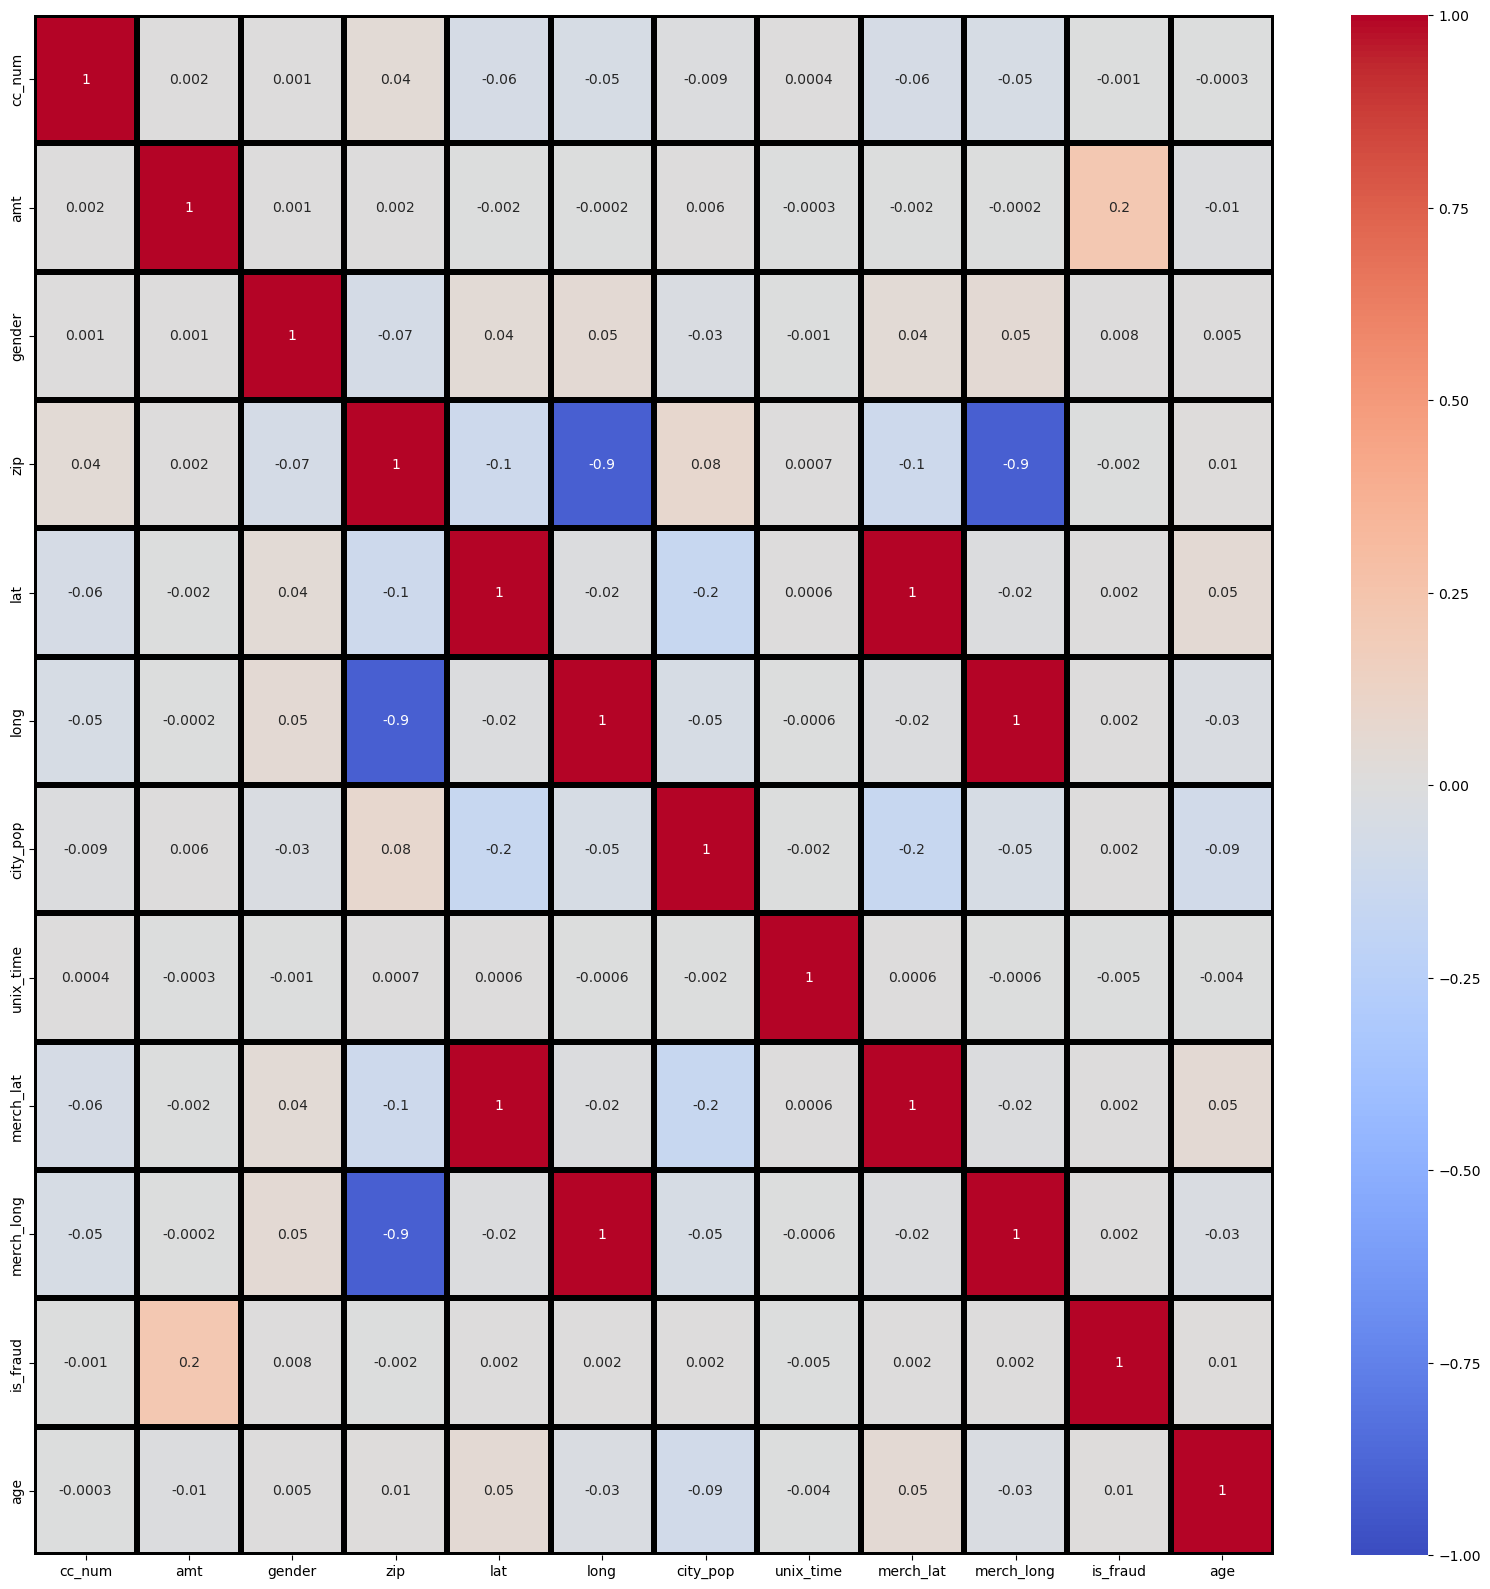

In [14]:
# Checking the coorelations between the variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot= True,fmt='.1g', vmin=-1, vmax=1, center= 0,linewidths=3, 
                                                                                        linecolor='black',cmap= 'coolwarm')
plt.show()

In [15]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encoding labels of following columns.  
df['state']= label_encoder.fit_transform(df['state']) 
df['job']= label_encoder.fit_transform(df['job']) 
df['merchant']= label_encoder.fit_transform(df['merchant'])
df['city']= label_encoder.fit_transform(df['city'])
df['street']= label_encoder.fit_transform(df['street'])
df['category']= label_encoder.fit_transform(df['category'])

In [16]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['trans_date_trans_time','first','last','unix_time','is_fraud','cc_num', 'trans_num'],axis=1)

# Putting response variable to y
y = df['is_fraud']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify = y,random_state=100)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (907672, 18)
y_train:  (907672,)
X_test:  (389003, 18)
y_test:  (389003,)


In [18]:
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Example function to preprocess data
def preprocess_data(X):
    # Drop the 'trans_date_trans_time' column if it exists
    if 'trans_date_trans_time' in X.columns:
        X = X.drop(columns=['trans_date_trans_time'])
    
    # Convert datetime columns to numeric
    datetime_columns = ['dob', 'trans_Date']
    for col in datetime_columns:
        if col in X.columns:
            X[col] = X[col].astype('int64') // 10**9  # Convert to seconds since epoch
    
    # Convert trans_Time to seconds if it's a datetime.time object
    if 'trans_Time' in X.columns:
        X['trans_Time'] = X['trans_Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
    
    # Convert categorical columns if any
    label_encoders = {}
    for col in X.columns:
        if X[col].dtype == 'object':
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            label_encoders[col] = le
    
    return X, label_encoders

# Preprocess the data
X_train_preprocessed, label_encoders = preprocess_data(X_train)

# Print before SMOTE
print("Before SMOTE, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))

# Apply SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train_preprocessed, y_train)

# Print after SMOTE
print("After SMOTE, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_smt).items())))
print(len(X_resampled_smt))


Before SMOTE, counts of label '0'&'1': [(0, 902418), (1, 5254)] 

After SMOTE, counts of label '0'&'1': [(0, 902418), (1, 902418)]
1804836


In [20]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=45)

# Train a logistic regression model before applying SMOTE
log_reg = LogisticRegression(random_state=45)
log_reg.fit(X_train_split, y_train_split)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val_split)

# Evaluate the model
print("Classification Report before SMOTE:\n", classification_report(y_val_split, y_val_pred))
print("Confusion Matrix before SMOTE:\n", confusion_matrix(y_val_split, y_val_pred))

Classification Report before SMOTE:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    180481
           1       0.00      0.00      0.00      1054

    accuracy                           0.99    181535
   macro avg       0.50      0.50      0.50    181535
weighted avg       0.99      0.99      0.99    181535

Confusion Matrix before SMOTE:
 [[180481      0]
 [  1054      0]]


In [24]:
from sklearn.model_selection import train_test_split
# Split the resampled data into training and validation sets
X_train_smt, X_val_smt, y_train_smt, y_val_smt = train_test_split(X_resampled_smt, y_resampled_smt, test_size=0.2, random_state=45)

# Train a logistic regression model
log_reg = LogisticRegression(random_state=45)
log_reg.fit(X_train_smt, y_train_smt)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val_smt)

# Evaluate the model
print("Classification Report:\n", classification_report(y_val_smt, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val_smt, y_val_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.72      0.65    180519
           1       0.65      0.53      0.58    180449

    accuracy                           0.62    360968
   macro avg       0.63      0.62      0.62    360968
weighted avg       0.63      0.62      0.62    360968

Confusion Matrix:
 [[129151  51368]
 [ 85463  94986]]
